<a href="https://colab.research.google.com/github/ali0onder/RNN-LSTM-for-NLP/blob/main/RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
data = pd.read_csv("trspam.csv",on_bad_lines='skip')
data

,Text,Classification
0,"Sayın Yetkili ,\n Gelişen ve değişen günümüz ...",spam
1,"Sayın Yetkili,\n \n28 Kasım 2010 tarihli KPSS ...",spam
2,"Sayın Yetkili ,\n Gelişen ve değişen günümüz ...",spam
3,T.C.\nURLA KAYMAKAMLIĞI\nURLA HAKAN ÇEKEN ANAD...,spam
4,"Sayın Yetkili ,Hızla büyüyen ve gelişmekte ola...",spam
...,...,...
696,DQoNCg0KDQoNCmdhcmRhuiBhumG7uWRha2kgZm9ybWF0dG...,ham
697,Ã¶zlem sent you a message.\n\n(no subject)\n\n...,ham
698,"Sayın Hocalarım, değerli zamanınızı aldığım iç...",ham
699,PGh0bWw+DQo8aGVhZD4NCjx0aXRsZT5DaGlwJmFtcDtQSU...,ham


In [ ]:
X = data["Text"]
Y = data["Classification"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

We'll singularize all numerical data in the text to 'NUMBER' before tokenization

In [ ]:
import re

def preprocess_text(text):
    if isinstance(text, str):
        text = re.sub(r'\d+', 'NUMBER', text)
    return text

X = [preprocess_text(str(text)) for text in X]
X = np.array(X)

In [ ]:
X[0]

'Sayın Yetkili ,\n  Gelişen ve değişen günümüz \n teknolojisi , çalışma koşıllarında özellikle kurumlarda çalışan personelin kurum bünyesinde her çalışma koşullarının ihtiyacını sağlayabilen , çalış...tığı departmana hızlı bir şekilde uyum sağlayan ve motive olabilen ,başka bir departmana geçtiği zaman oryantasyon ve adaptasyon sürecini başarıyla atlatan,yüksek verim sağlayan personelin arandığı yadsınamaz bir gerçektir.\n  Bu koşullar çerçevesinde bizler Büro Yönetimi ve Sekreterlik (NUMBER) mezunları olarak aldığımız eğitimler neticesinde ..\n  NUMBER. SANTRAL MEMURLUĞU (Gelen evrak ve giden evrak kayıt sistematiği bu memurdadır ve sekreterlik eğitimi alan bizlerin önceliğinin devam etmesi gerekir)\n  NUMBER.Arşivleme ve yöntemlerinin kullanılması\n NUMBER.Bürolarda kullanılan (fotokopi,fax,vb ofis cihazlarının) kullanılması\n NUMBER.On parmak klavye kullanımı\n NUMBER.Temel bilgisayar eğitimi ve office programlarının kullanılması\n NUMBER.Temel iktisat ve istatistik kavramları\n NUM

We'll assign a numerical value to each word and punctuation (tokenization). Since all sentences must be the same length before being feeded into model, we take the length of the longest sequence in the dataset and fill the other sequences with zeros from the beginning to even up.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_numeric = tokenizer.texts_to_sequences(X)
X_numeric = pad_sequences(X_numeric)
X_numeric

array([[    0,     0,     0, ...,  2009,  3211,   585],
       [    0,     0,     0, ...,  2587,   264,   181],
       [    0,     0,     0, ...,  2009,  3211,   585],
       ...,
       [    0,     0,     0, ...,     1,     1,     1],
       [    0,     0,     0, ..., 41075, 16919, 41076],
       [    0,     0,     0, ..., 41116, 16919, 41117]], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_numeric, Y, test_size=0.2, random_state=42)

In [ ]:
from keras.layers import SimpleRNN, Dense, Activation, Embedding, Bidirectional
from keras.models import Sequential

In [ ]:
input_dim = len(tokenizer.word_index)

We'll first try RNN.

In [ ]:
model = Sequential()

model.add(Embedding(input_dim = input_dim, output_dim = 3, embeddings_initializer="uniform"))

model.add(SimpleRNN(64, activation = "tanh", return_sequences=True))
model.add(SimpleRNN(16, activation="tanh"))
model.add(Dense(1,activation="sigmoid"))


model.compile(loss = "binary_crossentropy",
              optimizer = "RMSprop",
              metrics = ["accuracy"])


In [ ]:
model_train = model.fit(x_train,
                        y_train,
                        epochs = 8,
                        batch_size = 512,
                        validation_data = (x_test,y_test))


Epoch 1/8
2/2 [==============================] - 46s 19s/step - loss: 0.6970 - accuracy: 0.5393 - val_loss: 0.6947 - val_accuracy: 0.5674
Epoch 2/8
2/2 [==============================] - 39s 18s/step - loss: 0.6518 - accuracy: 0.6107 - val_loss: 0.6981 - val_accuracy: 0.5603
Epoch 3/8
2/2 [==============================] - 39s 20s/step - loss: 0.6352 - accuracy: 0.6071 - val_loss: 0.7494 - val_accuracy: 0.5603
Epoch 4/8
2/2 [==============================] - 39s 21s/step - loss: 0.6929 - accuracy: 0.6054 - val_loss: 0.6804 - val_accuracy: 0.5674
Epoch 5/8
2/2 [==============================] - 36s 19s/step - loss: 0.6596 - accuracy: 0.6107 - val_loss: 0.6729 - val_accuracy: 0.6383
Epoch 6/8
2/2 [==============================] - 37s 18s/step - loss: 0.6708 - accuracy: 0.6696 - val_loss: 0.7037 - val_accuracy: 0.4184
Epoch 7/8
2/2 [==============================] - 38s 20s/step - loss: 0.6959 - accuracy: 0.4518 - val_loss: 0.6962 - val_accuracy: 0.5603
Epoch 8/8
2/2 [===================

We got bad results, both training and validation shows sign of overfitting even in the first epochs.

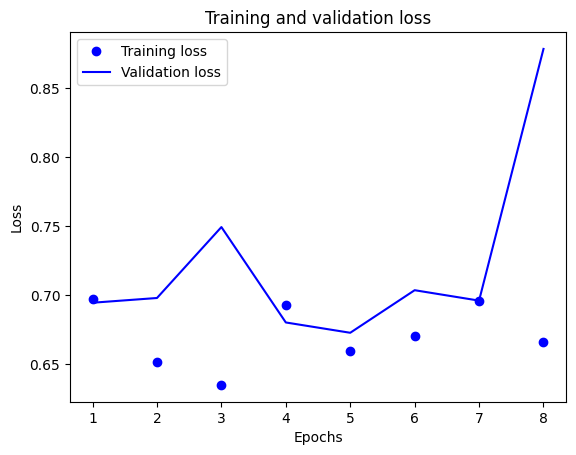

In [ ]:
loss = model_train.history["loss"]
val_loss = model_train.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

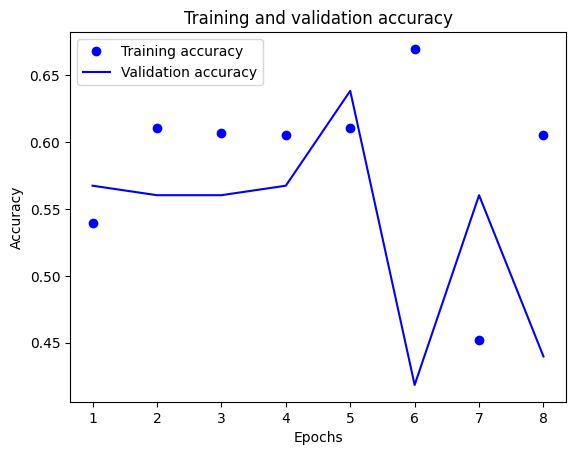

In [ ]:
plt.clf()
acc = model_train.history["accuracy"]
val_acc = model_train.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Let's try LSTM.

In [ ]:
from keras.layers import LSTM

In [ ]:
model_lstm = Sequential()

model_lstm.add(Embedding(input_dim = input_dim, output_dim = 3, embeddings_initializer="uniform"))

model_lstm.add(LSTM(64, activation = "tanh", return_sequences=True))
model_lstm.add(LSTM(16, activation = "tanh"))
model_lstm.add(Dense(1,activation="sigmoid"))

model_lstm.compile(loss = "binary_crossentropy",
                   optimizer = "RMSprop",
                   metrics = ["accuracy"])

model_lstm.compile(loss = "binary_crossentropy",
                   optimizer = "RMSprop",
                   metrics = ["accuracy"])

model_lstm_train = model.fit(x_train,
                        y_train,
                        epochs = 8,
                        batch_size = 512,
                        validation_data = (x_test,y_test))

Epoch 1/8
2/2 [==============================] - 38s 19s/step - loss: 0.9044 - accuracy: 0.3964 - val_loss: 0.6816 - val_accuracy: 0.5035
Epoch 2/8
2/2 [==============================] - 37s 19s/step - loss: 0.6769 - accuracy: 0.5054 - val_loss: 0.6669 - val_accuracy: 0.7376
Epoch 3/8
2/2 [==============================] - 39s 21s/step - loss: 0.6558 - accuracy: 0.8232 - val_loss: 0.6730 - val_accuracy: 0.5745
Epoch 4/8
2/2 [==============================] - 35s 18s/step - loss: 0.6653 - accuracy: 0.6143 - val_loss: 0.6934 - val_accuracy: 0.4468
Epoch 5/8
2/2 [==============================] - 37s 18s/step - loss: 0.6891 - accuracy: 0.4339 - val_loss: 0.6734 - val_accuracy: 0.6028
Epoch 6/8
2/2 [==============================] - 38s 21s/step - loss: 0.6615 - accuracy: 0.6339 - val_loss: 0.6674 - val_accuracy: 0.6028
Epoch 7/8
2/2 [==============================] - 35s 18s/step - loss: 0.6542 - accuracy: 0.6304 - val_loss: 0.6564 - val_accuracy: 0.6099
Epoch 8/8
2/2 [===================

Our results are more stable than RNN, but as we can see from the accuracy graph, it started to overfit just like RNN.

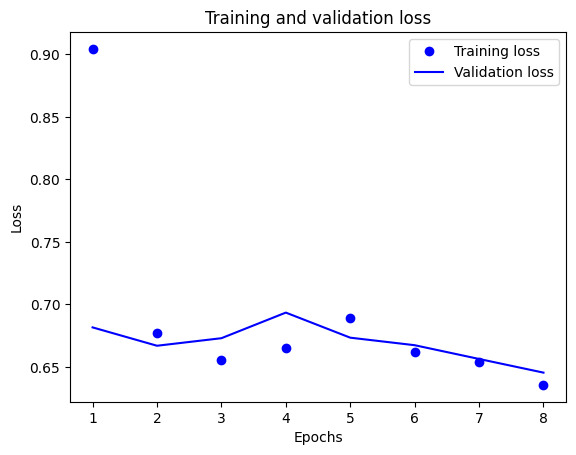

In [ ]:
loss = model_lstm_train.history["loss"]
val_loss = model_lstm_train.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

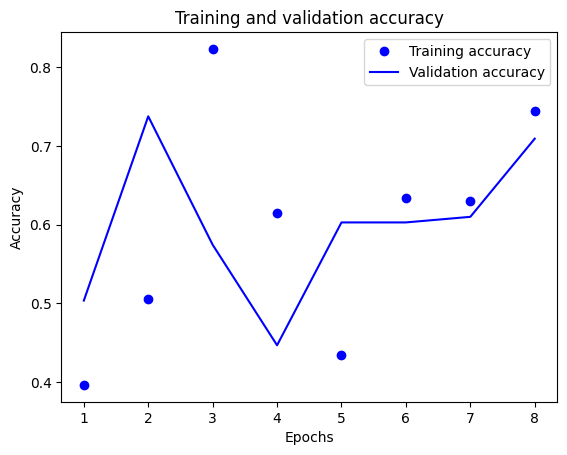

In [ ]:
plt.clf()
acc = model_lstm_train.history["accuracy"]
val_acc = model_lstm_train.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Let's add some dropout and reduce the number of neurons to decrease overfitting.

In [ ]:
model_lstm_2 = Sequential()

model_lstm_2.add(Embedding(input_dim = input_dim, output_dim = 3, embeddings_initializer="uniform"))

model_lstm_2.add(LSTM(16, activation = "tanh", return_sequences=True, dropout=0.2))
model_lstm_2.add(LSTM(8, activation = "tanh", dropout=0.2))
model_lstm_2.add(Dense(1,activation="sigmoid"))

model_lstm_2.compile(loss = "binary_crossentropy",
                   optimizer = "RMSprop",
                   metrics = ["accuracy"])

model_lstm_2.compile(loss = "binary_crossentropy",
                   optimizer = "RMSprop",
                   metrics = ["accuracy"])

model_lstm_2_train = model.fit(x_train,
                        y_train,
                        epochs = 8,
                        batch_size = 512,
                        validation_data = (x_test,y_test))

Epoch 1/8
2/2 [==============================] - 38s 21s/step - loss: 0.6216 - accuracy: 0.8964 - val_loss: 0.6267 - val_accuracy: 0.7447
Epoch 2/8
2/2 [==============================] - 39s 21s/step - loss: 0.5918 - accuracy: 0.8304 - val_loss: 0.6117 - val_accuracy: 0.7305
Epoch 3/8
2/2 [==============================] - 36s 18s/step - loss: 0.5675 - accuracy: 0.8232 - val_loss: 0.6163 - val_accuracy: 0.7447
Epoch 4/8
2/2 [==============================] - 38s 18s/step - loss: 0.5728 - accuracy: 0.9446 - val_loss: 0.5835 - val_accuracy: 0.7021
Epoch 5/8
2/2 [==============================] - 38s 20s/step - loss: 0.5142 - accuracy: 0.9143 - val_loss: 0.5532 - val_accuracy: 0.7518
Epoch 6/8
2/2 [==============================] - 38s 21s/step - loss: 0.4565 - accuracy: 0.9214 - val_loss: 0.5430 - val_accuracy: 0.7234
Epoch 7/8
2/2 [==============================] - 35s 18s/step - loss: 0.4377 - accuracy: 0.9357 - val_loss: 0.5191 - val_accuracy: 0.7943
Epoch 8/8
2/2 [===================

Our results are much better now. We gained a steady decline of both training and validation loss. They seem to decrease at almost the same rate.

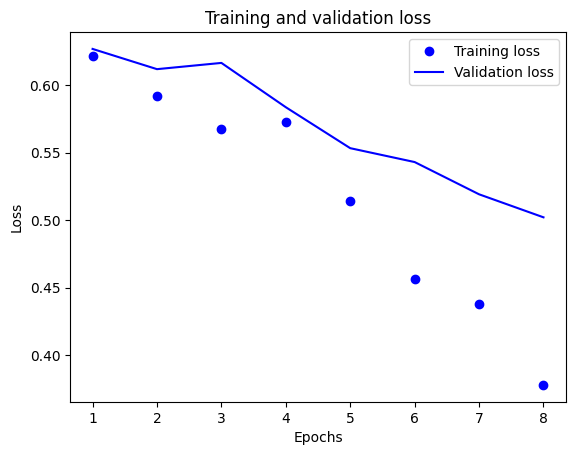

In [ ]:
loss = model_lstm_2_train.history["loss"]
val_loss = model_lstm_2_train.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Let's use Bidirectional layer just for fun. It won't make any significant difference in terms of performance.

In [ ]:
model_lstm_bi = Sequential()

model_lstm_bi.add(Embedding(input_dim = input_dim, output_dim = 3, embeddings_initializer="uniform"))

model_lstm_bi.add(Bidirectional(LSTM(16, activation = "tanh", return_sequences=True, dropout=0.2)))
model_lstm_bi.add(Bidirectional(LSTM(8, activation = "tanh", dropout=0.2)))
model_lstm_bi.add(Dense(1,activation="sigmoid"))

model_lstm_bi.compile(loss = "binary_crossentropy",
                   optimizer = "RMSprop",
                   metrics = ["accuracy"])

model_lstm_bi.compile(loss = "binary_crossentropy",
                   optimizer = "RMSprop",
                   metrics = ["accuracy"])

model_lstm_bi_train = model.fit(x_train,
                        y_train,
                        epochs = 8,
                        batch_size = 512,
                        validation_data = (x_test,y_test))

Epoch 1/8
2/2 [==============================] - 43s 21s/step - loss: 0.3429 - accuracy: 0.9107 - val_loss: 0.6043 - val_accuracy: 0.6170
Epoch 2/8
2/2 [==============================] - 37s 19s/step - loss: 0.5364 - accuracy: 0.6357 - val_loss: 0.6407 - val_accuracy: 0.5603
Epoch 3/8
2/2 [==============================] - 38s 18s/step - loss: 0.6037 - accuracy: 0.6054 - val_loss: 0.6166 - val_accuracy: 0.6099
Epoch 4/8
2/2 [==============================] - 39s 21s/step - loss: 0.5480 - accuracy: 0.6714 - val_loss: 0.7395 - val_accuracy: 0.4397
Epoch 5/8
2/2 [==============================] - 38s 19s/step - loss: 0.6979 - accuracy: 0.4446 - val_loss: 0.6083 - val_accuracy: 0.6241
Epoch 6/8
2/2 [==============================] - 36s 18s/step - loss: 0.5506 - accuracy: 0.6304 - val_loss: 0.5993 - val_accuracy: 0.7730
Epoch 7/8
2/2 [==============================] - 38s 19s/step - loss: 0.5497 - accuracy: 0.9339 - val_loss: 0.6027 - val_accuracy: 0.6879
Epoch 8/8
2/2 [===================

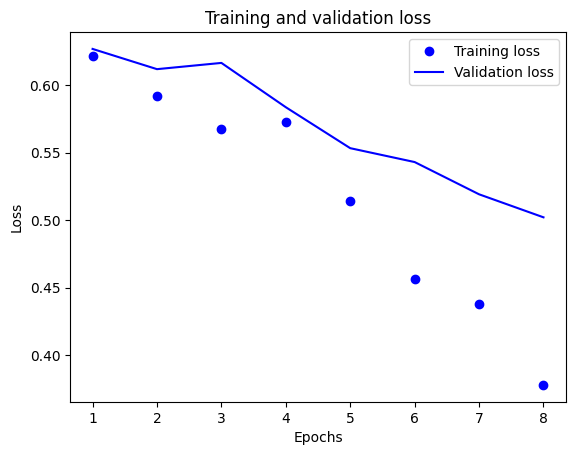

In [ ]:
loss = model_lstm_2_train.history["loss"]
val_loss = model_lstm_2_train.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()